In [ ]:
train_file_path='content/drive/MyDrive/archive/Mall_Customers.csv'

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:

import pandas as pd
data=pd.read_csv('Mall_Customers.csv')

In [5]:

#print the shape of dataset
#print the specific columns

print(data.shape)
print(data.head())

(200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

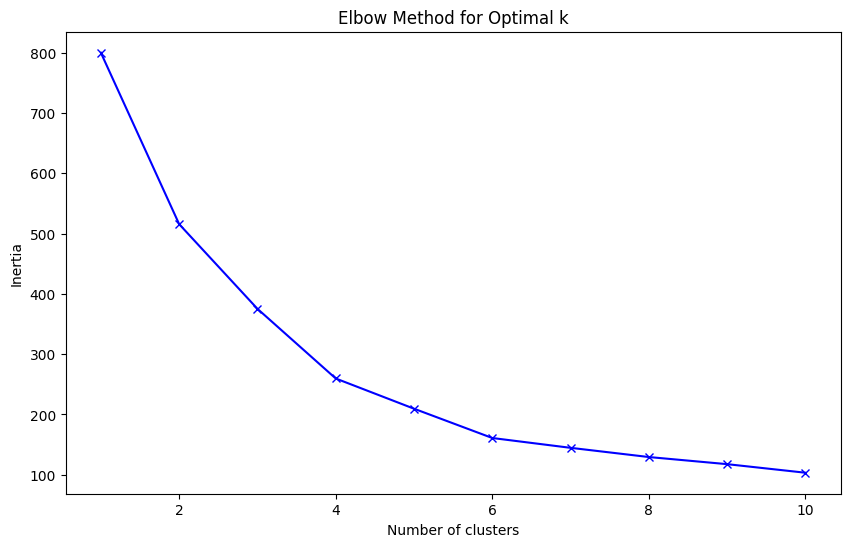

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.33627250175154105


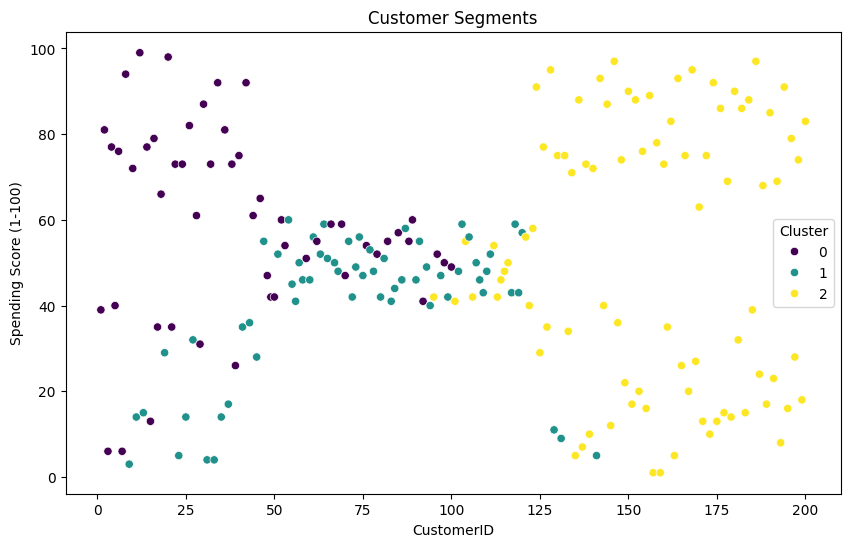

In [6]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import numpy as np # Import numpy for numerical operations



# Handle missing values
data = data.dropna()

# Select only the numeric columns for scaling
numeric_columns = data.select_dtypes(include=[np.number]).columns
data_numeric = data[numeric_columns]

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Step 3: Choosing the Number of Clusters (k)
# Using the Elbow Method
try:
    inertia = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_scaled)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

# Assuming optimal k is found (for example, k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Evaluating the Clusters
silhouette_avg = silhouette_score(data_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Visualize the clusters
plt.figure(figsize=(10, 6))
# Correct the column name for 'Spending Score'
sns.scatterplot(data=data, x='CustomerID', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()

# Save the clustered data
data.to_csv('customer_segments.csv', index=False)